# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
# import tensorflow as tf
# from tensorflow.keras import layers, regularizers, callbacks
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import warnings 
warnings.filterwarnings("ignore")

In [2]:
global_seed = 716492448

In [3]:
loaded_df = pd.read_csv("../Output/Data/processed_data.csv")
loaded_df.head(1)
loaded_df['Price'] = loaded_df['Price'] / 1000000 #/ 25500 # chuyển sang đô la
loaded_df = loaded_df.drop(columns=['CPU Name','GPU Name','Storage Type'])
loaded_df = loaded_df.sample(frac=1,random_state=global_seed).reset_index(drop=True)
split_index = int(len(loaded_df)*0.85)
train_val_df = loaded_df.iloc[:split_index]
test_df = loaded_df.iloc[split_index:]
X_test = test_df.drop('Price', axis=1)
y_test = test_df['Price']

## Info

In [13]:
loaded_df.describe()

,Price,CPU Lithography,CPU Core,CPU Thread,CPU Cache,CPU Base Clock,CPU Max Clock,CPU Intel,CPU Series,RAM,...,GPU Onboard,GPU AMD,GPU NVIDIA,Display Type,Display Size,Display Frequency,OS,Warrant,Display Width,Display Height
count,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,...,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000,906.000000
mean,32.749062,7.149007,11.780353,16.207506,18.252759,3.642605,4.791336,0.952539,6.178808,25.090508,...,0.768212,0.040839,0.190949,0.694260,15.232009,93.509934,10.823400,19.889625,2164.852097,1287.456954
std,23.390985,1.083724,4.724602,6.462214,8.581434,1.565038,0.339824,0.212741,1.602840,20.742317,...,0.422207,0.198026,0.393266,0.460974,2.154515,54.931182,0.381541,8.305557,434.109967,305.769358
min,8.490000,4.000000,2.000000,4.000000,6.000000,0.700000,3.700000,0.000000,3.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,30.000000,10.000000,12.000000,1920.000000,1080.000000
25%,18.615000,7.000000,10.000000,12.000000,12.000000,1.800000,4.600000,1.000000,5.000000,16.000000,...,1.000000,0.000000,0.000000,0.000000,14.000000,60.000000,11.000000,12.000000,1920.000000,1080.000000
50%,24.094500,7.000000,10.000000,15.000000,12.000000,4.500000,4.700000,1.000000,7.000000,16.000000,...,1.000000,0.000000,0.000000,1.000000,15.000000,60.000000,11.000000,24.000000,1920.000000,1080.000000
75%,37.990000,7.000000,14.000000,20.000000,24.000000,4.700000,5.000000,1.000000,7.000000,32.000000,...,1.000000,0.000000,0.000000,1.000000,16.000000,120.000000,11.000000,24.000000,2560.000000,1440.000000
max,149.990000,14.000000,24.000000,32.000000,80.000000,5.600000,5.800000,1.000000,9.000000,128.000000,...,1.000000,1.000000,1.000000,1.000000,32.000000,360.000000,11.000000,36.000000,4500.000000,3000.000000


In [15]:
print(loaded_df['Price'].max())
print(loaded_df['Price'].min())
print(loaded_df['Price'].mean())
print(loaded_df['Price'].var())
print(loaded_df['Price'].std())

print(test_df['Price'].max())
print(test_df['Price'].min())
print(test_df['Price'].mean())
print(test_df['Price'].var())
print(test_df['Price'].std())

149.99
8.49
32.74906181015453
547.1381800249046
23.390985016131847
149.49
8.49
29.235970588235297
405.6814959250545
20.141536583018052


## Correlation Matrix

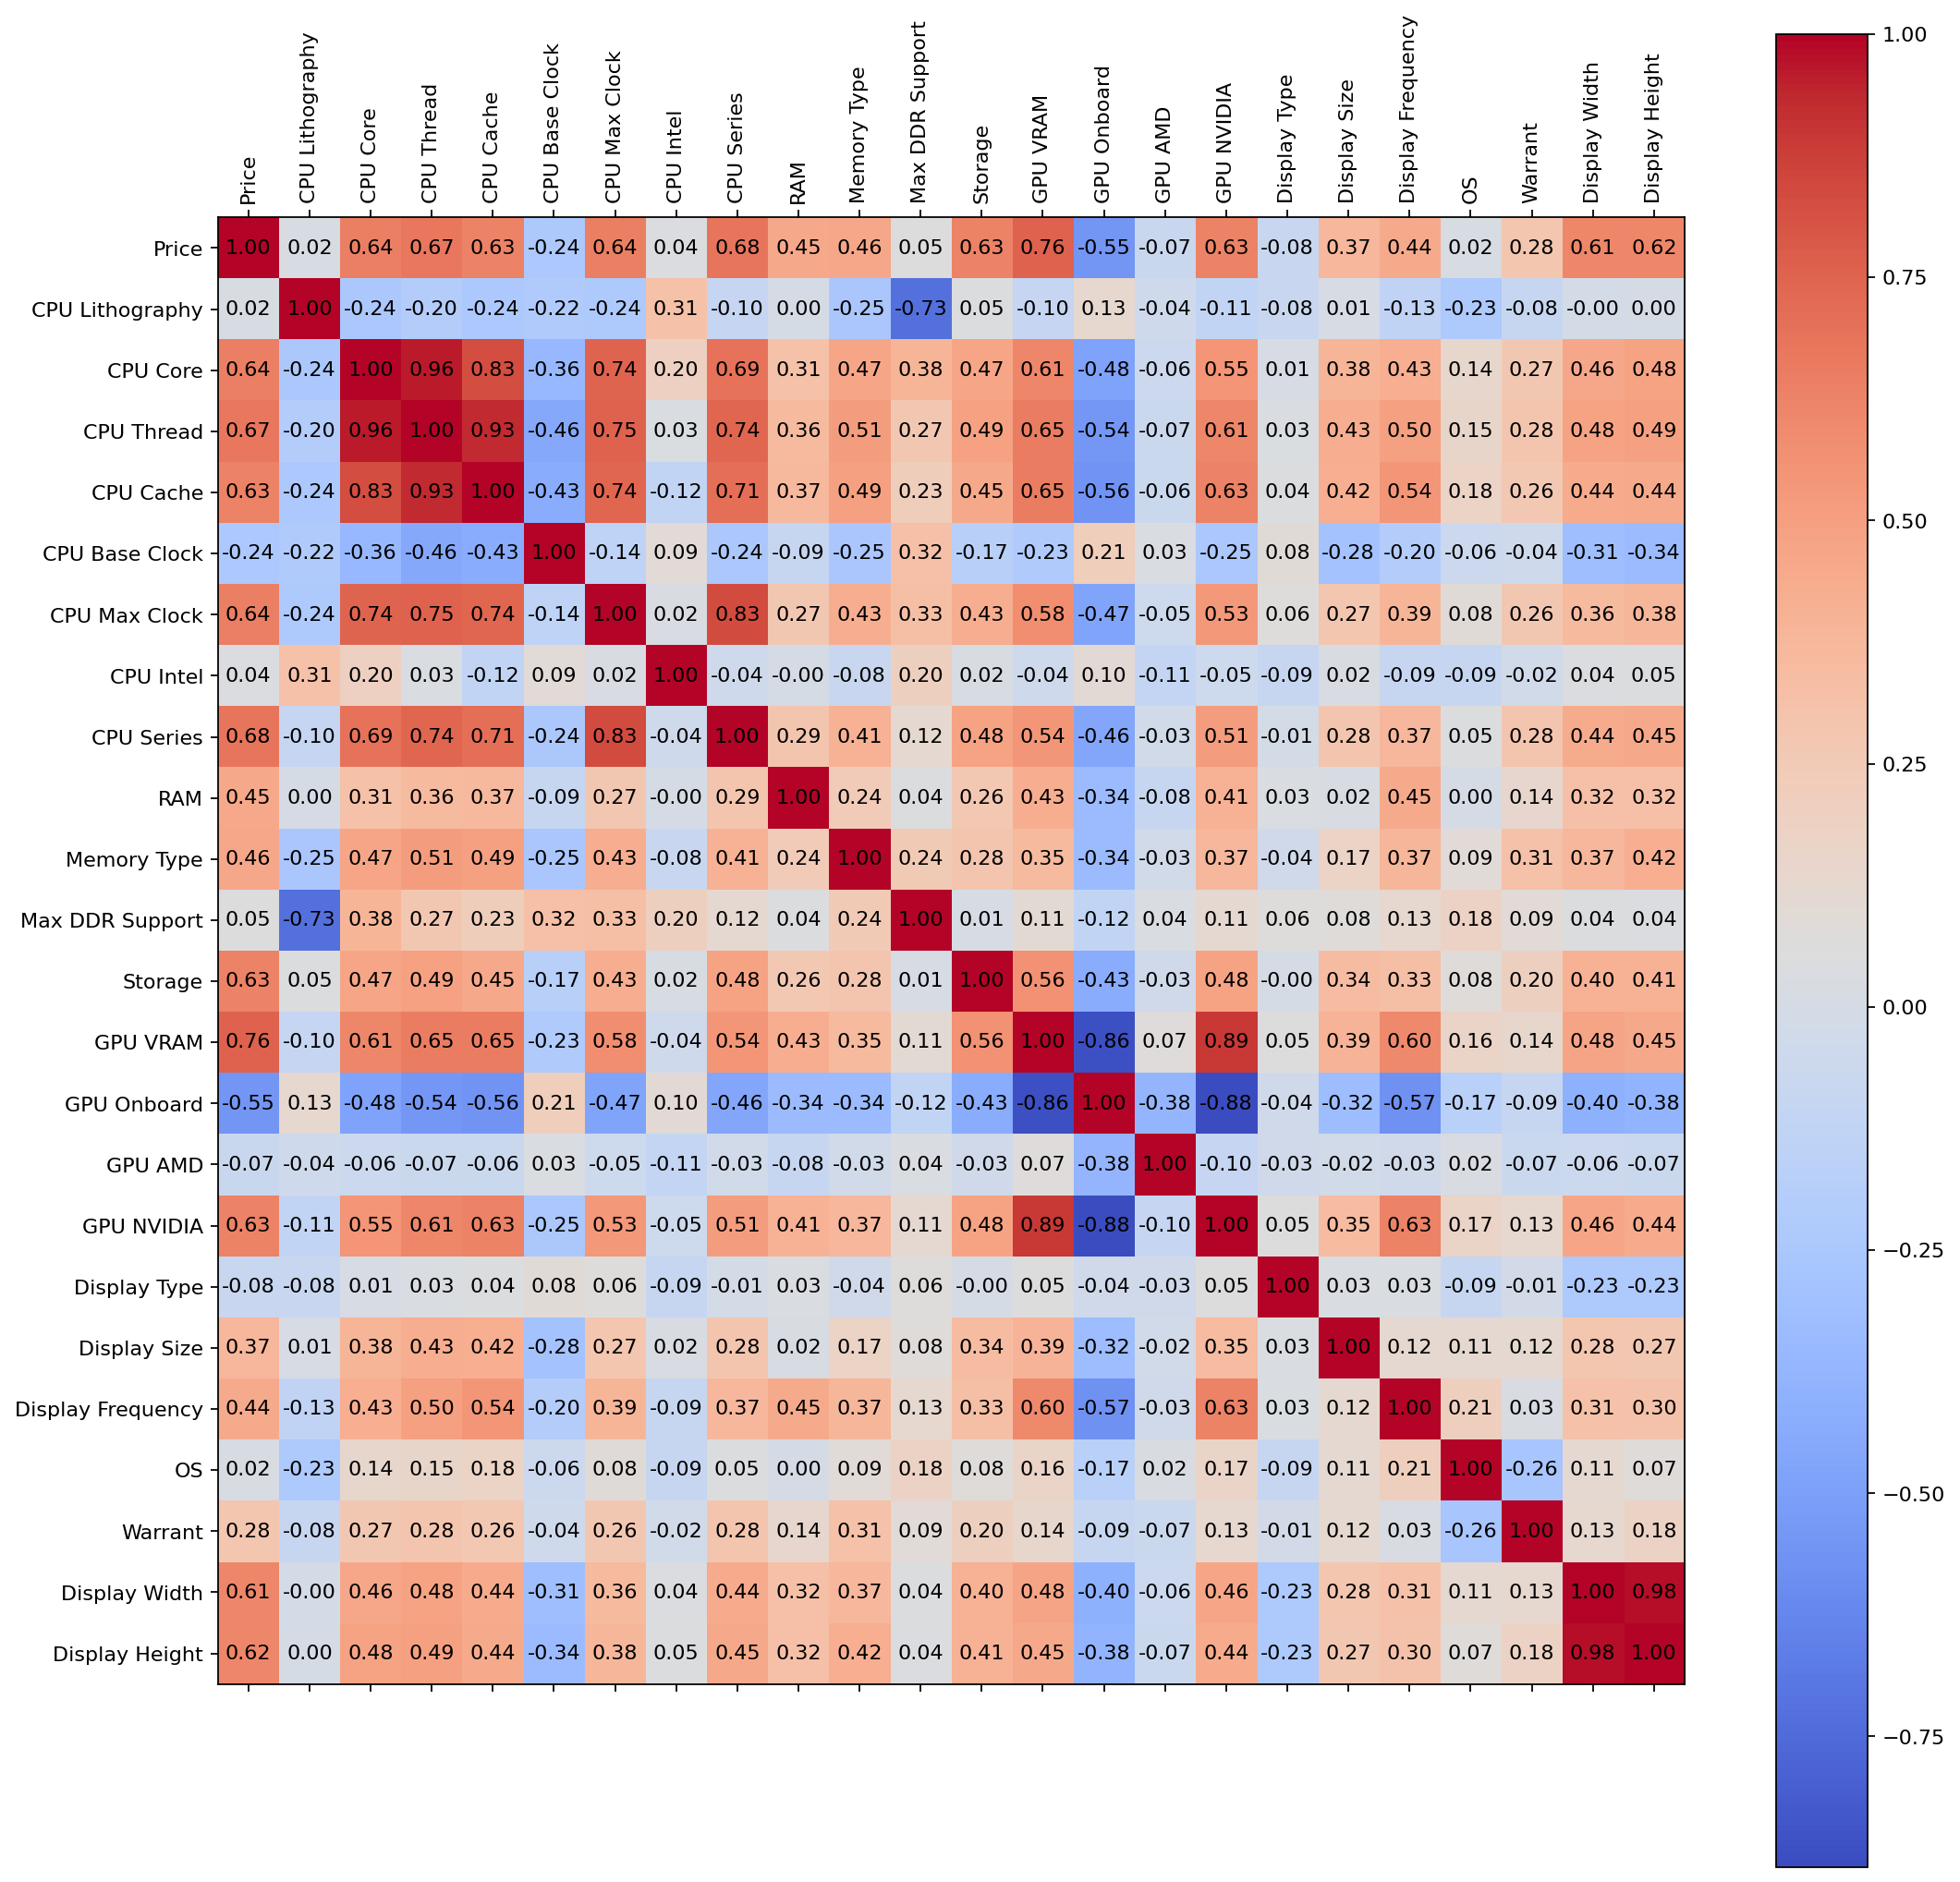

In [23]:
correlation_matrix = loaded_df.corr()
plt.figure(figsize=(16,16),dpi=160)
plt.matshow(correlation_matrix,cmap='coolwarm',fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)),correlation_matrix.columns,rotation=90)
plt.yticks(range(len(correlation_matrix.columns)),correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j,i,f'{correlation_matrix.iloc[j,i]:.2f}',ha='center',va='center',color='black')
    #break
plt.savefig('..\Output\Image\Correlation.png',dpi=320)
plt.show()


# Mean Predict

In [9]:
mean_pred = train_val_df.mean()
mean_df = pd.DataFrame([mean_pred]*len(y_test))
mean_y = mean_df['Price']
mean_X = mean_df.drop('Price', axis=1)
mean_r2 = r2_score(y_true=y_test,y_pred=mean_y)
mean_mse = mean_squared_error(y_test,mean_y)
mean_mae = mean_absolute_error(y_test,mean_y)
print('Mean R2 : {}'.format(mean_r2))
print('Mean MSE : {}'.format(mean_mse))
print('Mean MAE : {}'.format(mean_mae))

Mean R2 : -0.04243006917504033
Mean MSE : 419.7850708170987
Mean MAE : 15.230977272727273


# Simple Linear Regression

In [6]:
df = train_val_df.copy()
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=global_seed)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

Mean squared error: 80.11548275840836
R2 Score: 0.8010534579724801
Mean absolute error: 6.77426268594542


# Polynomial Regression

Polynomial Modify

In [ ]:
df = train_val_df.copy()
# df['Display Resolution'] = raw_df['Display Height'] * raw_df['Display Width']
# df['Display Ratio'] = raw_df['Display Size'] / raw_df['Display Resolution']
# df = df.drop(columns=['Display Height','Display Width'])
# df['GPU VRAM S'] = df['GPU VRAM']**2
df['Warrant S'] = df['Warrant']**2
df['CPU Cache S'] = df['CPU Cache']**2
# df['Display Height 2'] = df['Display Height']**2
# df['Display Size'] = 1/df['Display Size']
# df['Product 1'] = df['RAM'] * df['Display Size']
# df['Product 2'] = df['RAM'] * df['GPU VRAM']
# df['Product 3'] = df['RAM'] * df['CPU Thread']
# df['Product 4'] = df['RAM'] * df['CPU Core']
# df['Product 5'] = df['RAM'] * df['CPU Cache']
# df['Product 6'] = df['RAM'] * df['CPU Base Clock']
# df['Product 7'] = df['RAM'] * df['CPU Max Clock']
# df['Product 8'] = df['RAM'] * df['Base Power']
# df['Product 9'] = df['RAM'] * df['Max Power']
# df['Storage Ratio'] = df['Storage'] / df['RAM']
# df['CPU Effecient'] = df['Base Power'] / df['CPU Core']
# df['CPU Max Effecient'] = df['Base Power'] / df['CPU Core']
# df['Display Frequency'] = df['Display Frequency']**2
# df = df.drop(columns=['Display Size'])
test_df = loaded_df[split_index:]
# test_df['GPU VRAM S'] = test_df['GPU VRAM']**2
test_df['Warrant S'] = test_df['Warrant']**2
test_df['CPU Cache S'] = test_df['CPU Cache']**2
# test_df['Product 1'] = test_df['RAM'] * test_df['Display Size']
# test_df['Product 2'] = test_df['RAM'] * test_df['GPU VRAM']
X_test = test_df.drop('Price', axis=1)
y_test = test_df['Price']

Reset Dataframe to default

In [ ]:
df = train_val_df.copy()
test_df = loaded_df[split_index:]
X_test = test_df.drop('Price', axis=1)
y_test = test_df['Price']

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=39)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

## Grid Search

In [13]:
def grid_search_polynomial(pow : float = 2,cross_val : bool = True,random_state : int = 42):
    cols = train_val_df.columns
    result = {}
    def inner_grid_search(df_):
        X_ = df_.drop('Price', axis=1)
        y_ = df_['Price']
        X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=random_state)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val,y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        inner_result = [r2,mae,mse]
        return inner_result
    def inner_grid_search_cross_val(df_):
        X_ = df_.drop('Price', axis=1)
        y_ = df_['Price']
        model = LinearRegression()
        mse = -cross_val_score(model,X_,y_,cv=5,scoring='neg_mean_squared_error').mean()
        r2 = cross_val_score(model,X_,y_,cv=5,scoring='r2').mean()
        mae = -cross_val_score(model,X_,y_,cv=5,scoring='neg_mean_absolute_error').mean()
        inner_result = [r2,mae,mse]
        return inner_result
    for col in cols:
        df = train_val_df.copy()
        df[col+' S'] = df[col] ** pow
        if (cross_val == True):
            result[col] = inner_grid_search_cross_val(df)
        else:
            result[col] = inner_grid_search(df)
    result['Base'] = inner_grid_search(train_val_df.copy())
    return result

In [1]:
def grid_search_product(cross_val : bool = True,random_state : int = 42):
    cols = train_val_df.columns
    result = {}
    def inner_grid_search(df_):
        X_ = df_.drop('Price', axis=1)
        y_ = df_['Price']
        X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=random_state)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        r2 = r2_score(y_val,y_pred)
        mae = mean_absolute_error(y_val, y_pred)
        inner_result = [r2,mae,mse]
        return inner_result
    def inner_grid_search_cross_val(df_):
        X_ = df_.drop('Price', axis=1)
        y_ = df_['Price']
        model = LinearRegression()
        mse = -cross_val_score(model,X_,y_,cv=5,scoring='neg_mean_squared_error').mean()
        r2 = cross_val_score(model,X_,y_,cv=5,scoring='r2').mean()
        mae = -cross_val_score(model,X_,y_,cv=5,scoring='neg_mean_absolute_error').mean()
        inner_result = [r2,mae,mse]
        return inner_result
    for i in range(len(cols)):
        for j in range(i+1,len(cols)):
            df = train_val_df.copy()
            df['Product Column'] = df[cols[i]] * df[cols[j]]
            if (cross_val == True):
                result[cols[i] + '|' + cols[j]] = inner_grid_search_cross_val(df)
            else:
                result[cols[i] + '|' + cols[j]] = inner_grid_search(df)
    result['Base'] = inner_grid_search(train_val_df.copy())
    return result

In [15]:
def format_result(result_ : dict):
    base = result_['Base']
    for key in result_:
        if (key != 'Base'):
            for i in range(len(result_[key])):
                result_[key][i] -= base[i]
def sorted_print(result_ : dict):
    local_result = result_.copy()
    while(len(local_result) > 0):
        max = -1
        max_key = None
        for key in local_result:
            if (local_result[key][0] > max):
                max = local_result[key][0]
                max_key = key
        print(local_result[max_key],max_key)
        local_result.pop(max_key)


In [16]:
result = grid_search_polynomial(cross_val=False,random_state=39)
format_result(result)
sorted_print(result)
# for col in result:
#     print(result[col],col)

[0.8222364770523922, 7.389537388319317, 120.72510653768315] Base
[0.13105312795629653, -3.799990638455754, -89.00252747175561] Price
[0.007496392293197429, -0.1541618119974526, -5.091048732822799] Warrant
[0.006407120925420617, -0.05016839741687473, -4.351288405491445] Display Width
[0.0008326637288165184, 0.0026641438672925233, -0.5654895656015384] CPU Cache
[0.0003638878123302103, -0.05416530254018781, -0.24712828696739564] CPU Lithography
[0.0002923618948538209, -0.0024576473612141214, -0.19855266321535225] RAM
[3.0635894475605774e-05, 0.0004998996533949196, -0.02080585242191546] CPU Thread
[1.9984014443252818e-15, -5.595524044110789e-14, -1.4210854715202004e-12] OS
[1.4432899320127035e-15, -2.6645352591003757e-15, -1.0373923942097463e-12] GPU NVIDIA
[1.2212453270876722e-15, -2.3092638912203256e-14, -8.526512829121202e-13] GPU Onboard
[7.771561172376096e-16, 4.440892098500626e-15, -5.968558980384842e-13] Max DDR Support
[5.551115123125783e-16, -2.6645352591003757e-15, -4.26325641456

# Other

In [45]:
def grid_search_single_poly(from_ : float,to_ : float, step : float):
    result = []
    def inner(value):
        df = train_val_df.copy()

        df['GPU VRAM S'] = df['GPU VRAM']**0.25
        df['Warrant S'] = df['Warrant']**0.975

        # test_df = loaded_df[split_index:]
        # test_df['GPU VRAM S'] = test_df['GPU VRAM']**value
        # test_df['Warrant S'] = test_df['Warrant']**value

        # X_test = test_df.drop('Price', axis=1)
        # y_test = test_df['Price']
        
        X = df.drop('Price', axis=1)
        y = df['Price']
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)

        mse = mean_squared_error(y_val, y_pred)

        r2 = r2_score(y_val,y_pred)

        mae = mean_absolute_error(y_val, y_pred)
        result.append([value,r2,mse,mae])
    while(True):
        inner(from_)
        from_+=step
        if (from_ > to_):
            return result

In [46]:
result = grid_search_single_poly(5,10,0.1)
for ele in result:
    print(ele[1],ele[0],ele[2],ele[3])

0.77499313371478 5 105.25645420054587 7.492806942619008
0.77499313371478 5.1 105.25645420054587 7.492806942619008
0.77499313371478 5.199999999999999 105.25645420054587 7.492806942619008
0.77499313371478 5.299999999999999 105.25645420054587 7.492806942619008
0.77499313371478 5.399999999999999 105.25645420054587 7.492806942619008
0.77499313371478 5.499999999999998 105.25645420054587 7.492806942619008
0.77499313371478 5.599999999999998 105.25645420054587 7.492806942619008
0.77499313371478 5.6999999999999975 105.25645420054587 7.492806942619008
0.77499313371478 5.799999999999997 105.25645420054587 7.492806942619008
0.77499313371478 5.899999999999997 105.25645420054587 7.492806942619008
0.77499313371478 5.9999999999999964 105.25645420054587 7.492806942619008
0.77499313371478 6.099999999999996 105.25645420054587 7.492806942619008
0.77499313371478 6.199999999999996 105.25645420054587 7.492806942619008
0.77499313371478 6.299999999999995 105.25645420054587 7.492806942619008
0.77499313371478 6.3

In [21]:
df = train_val_df.copy()
# df['Display Resolution'] = raw_df['Display Height'] * raw_df['Display Width']
# df['Display Ratio'] = raw_df['Display Size'] / raw_df['Display Resolution']
# df = df.drop(columns=['Display Height','Display Width'])
# df['GPU VRAM S'] = df['GPU VRAM']**2
df['Warrant S'] = df['Warrant']**2
df['CPU Cache S'] = df['CPU Cache']**2
# df['Display Height 2'] = df['Display Height']**2
# df['Display Size'] = 1/df['Display Size']
# df['Product 1'] = df['RAM'] * df['Display Size']
# df['Product 2'] = df['RAM'] * df['GPU VRAM']
# df['Product 3'] = df['RAM'] * df['CPU Thread']
# df['Product 4'] = df['RAM'] * df['CPU Core']
# df['Product 5'] = df['RAM'] * df['CPU Cache']
# df['Product 6'] = df['RAM'] * df['CPU Base Clock']
# df['Product 7'] = df['RAM'] * df['CPU Max Clock']
# df['Product 8'] = df['RAM'] * df['Base Power']
# df['Product 9'] = df['RAM'] * df['Max Power']
# df['Storage Ratio'] = df['Storage'] / df['RAM']
# df['CPU Effecient'] = df['Base Power'] / df['CPU Core']
# df['CPU Max Effecient'] = df['Base Power'] / df['CPU Core']
# df['Display Frequency'] = df['Display Frequency']**2
# df = df.drop(columns=['Display Size'])
test_df = loaded_df[split_index:]
# test_df['GPU VRAM S'] = test_df['GPU VRAM']**2
test_df['Warrant S'] = test_df['Warrant']**2
test_df['CPU Cache S'] = test_df['CPU Cache']**2
# test_df['Product 1'] = test_df['RAM'] * test_df['Display Size']
# test_df['Product 2'] = test_df['RAM'] * test_df['GPU VRAM']
X_test = test_df.drop('Price', axis=1)
y_test = test_df['Price']

In [7]:
df = train_val_df.copy()
test_df = loaded_df[split_index:]
X_test = test_df.drop('Price', axis=1)
y_test = test_df['Price']

In [22]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,random_state=39)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

Mean squared error: 92.67717565811017
R2 Score: 0.8442912920045562
Mean absolute error: 6.814549673454792


In [ ]:
model = LinearRegression()
mse = -cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error').mean()
r2 = cross_val_score(model,X,y,cv=5,scoring='r2').mean()
mae = -cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error').mean()
print(f'Mean squared error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean absolute error: {mae}')

# Model Selection, Training, Evaluation

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

r2 = r2_score(y_test,y_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean absolute error: {mae}')

In [ ]:
def grid_search_single_axis(from_ : float,to_ : float,step : float,model,set_func : callable,
                            X_train_,X_test_,y_train_,y_test_,result = None):
    if (result == None):
        result = []
    set_func(model,from_)
    if (from_ > to_):
        return result
    model.fit(X_train_,y_train_)
    y_pred_ = model.predict(X_test_)
    r2_ =  r2_score(y_test_,y_pred_)
    result.append([from_,r2_])
    from_ += step
    return grid_search_single_axis(from_,to_,step,model,set_func,X_train_,X_test_,y_train_,y_test_,result)
    

In [ ]:
para = 1
lasso = Ridge(alpha=para)
def set_function(model,alpha):
    model.alpha = alpha
result = grid_search_single_axis(0,1,0.01,lasso,set_function,X_train,X_test,y_train,y_test)
for step in result:
    print('R2 : {} , Alpha : {}'.format(step[1],step[0]))

In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
para = 1
# Lasso Regression (L1 regularization)
lasso = Lasso(alpha=para)  # Alpha is the regularization parameter (lambda)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test,lasso_pred)
print("Lasso MSE:", lasso_mse)
print("Lasso R2:", lasso_r2)

# Ridge Regression (L2 regularization)
ridge = Ridge(alpha=para)  # Alpha is the regularization parameter (lambda)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test,ridge_pred)
print("Ridge MSE:", ridge_mse)
print("Ridge R2:", ridge_r2)

In [ ]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

forest.score(X_test, y_test)

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(random_state=45, max_samples=0.22),
    'Support Vector Machine': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(silent=True)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate mean absolute error scores
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test,y_test_pred)
    
    # Print the name of the model and its mean absolute error scores
    print(f'{name}: Train MAE = {train_mae}') 
    print(f'{name}: Test MAE = {test_mae}')
    print(f'{name}: R2 = {r2}')
    print('***********************')